In [7]:
import numpy as np
import scipy.integrate as ode
import random as rd
import os
import time
from tqdm import tqdm
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import matplotlib.colorbar as mcolorbar
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns

The system is comprised of some inhibitions (generalized repressilator)
$$\frac{dx_i}{dt}=\beta\frac{1}{1+x_{i-1}^n}-dx_i$$

In [8]:
# parameter setting
n=10         # hill coef
d=0.5       # degradation
beta=2      # hill constant

# ODE function
def repressilator(t,z):
    x=z
    dxdt=np.zeros(size)
    for i in range(0,size):
        dxdt[i]=beta/(1+x[(i-1)%size]**n)+beta/(1+x[(i-2)%size]**n)+beta/(1+x[(i-3)%size]**n)-d*x[i]
        # dxdt[i]=beta/(1+x[(i-1)%size]**n)-d*x[i]
    return dxdt

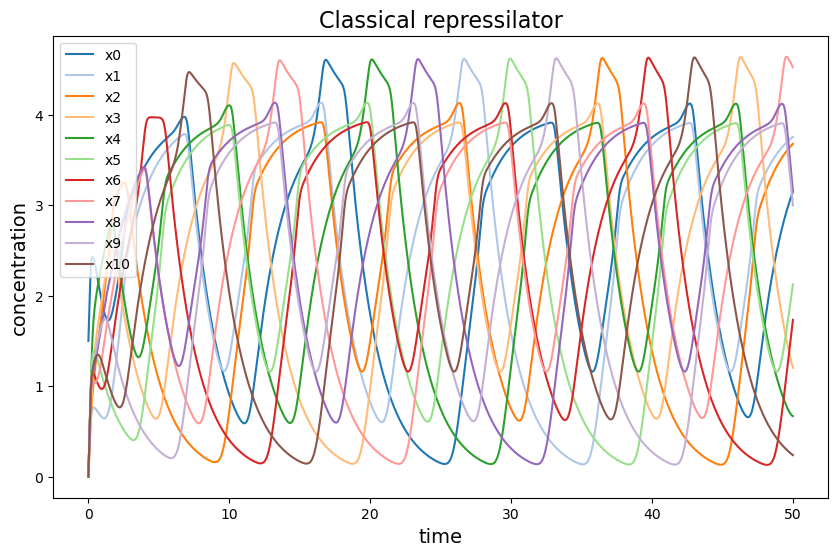

In [9]:
# simulation setting
simu_time=50
timespan=(0,simu_time)
size=11
z0=[0 for _ in range(size)]
z0[0]=1.5

results:list[any]=[None]*size
results=ode.solve_ivp(repressilator, timespan, z0, t_eval=np.linspace(0,simu_time,simu_time*100+1), method='RK45', rtol=1e-6, atol=1e-9)

# plotting
plt.figure(figsize=(10, 6))
for i in range(0, size):
    plt.plot(results.t, results.y[i], label=f'x{i}', color=plt.cm.tab20(i), linestyle='-') 
#plt.plot(results.t, results.y[0], label=f'x0', color=plt.cm.tab20(0), linestyle='-')
plt.title('Classical repressilator', fontsize=16)
plt.xlabel('time', fontsize=14)
plt.ylabel('concentration', fontsize=14)
plt.legend()

plt.show()